# Question 02
For a given dataset predict number of bikes getting shared based on
different parameters \
https://drive.google.com/open?id=1ohN2o3zSZ2Xuy4CIdTWN-dTmciUXiz
st

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler as SS
SS=SS()
from sklearn.metrics import *
%matplotlib inline

In [2]:
# Reading in the data
try:
    data = pd.read_csv("bike_sharing.csv")
except Exception as e:
    print(f"Error : {e}")

### Data Processing and Analysis

In [3]:
data.sample(5)   # Printing the first 5 rows of data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
9109,9110,2012-01-20,1,1,1,11,0,5,1,2,0.20,0.1818,0.32,0.3582,6,117,123
15253,15254,2012-10-02,4,1,10,18,0,2,1,3,0.62,0.5455,0.94,0.0896,48,639,687
4673,4674,2011-07-18,3,0,7,15,0,1,1,1,0.84,0.8030,0.53,0.3284,53,111,164
12766,12767,2012-06-21,3,1,6,3,0,4,1,1,0.72,0.6970,0.74,0.0000,3,8,11
2244,2245,2011-04-08,2,0,4,9,0,5,1,2,0.36,0.3485,0.76,0.1940,17,168,185


In [4]:
data = data.drop(['instant','dteday','holiday','weathersit' ,'atemp'], axis = 1)

In [5]:
data.shape

(17379, 12)

In [6]:
# data[data.weathersit == 2].shape 

In [7]:
data.sample(10)

,season,yr,mnth,hr,weekday,workingday,temp,hum,windspeed,casual,registered,cnt
8329,4,0,12,17,0,0,0.28,0.46,0.1642,10,126,136
186,1,0,1,1,0,0,0.10,0.42,0.4627,0,12,12
5264,3,0,8,6,5,1,0.62,0.50,0.1343,3,73,76
3917,2,0,6,3,5,1,0.56,0.94,0.1045,1,5,6
15983,4,1,11,16,6,0,0.36,0.46,0.3284,108,292,400
15037,4,1,9,18,0,0,0.54,0.37,0.1940,135,405,540
13557,3,1,7,2,2,1,0.66,0.83,0.1642,6,10,16
6057,3,0,9,23,3,1,0.64,0.69,0.1045,10,62,72
253,1,0,1,22,2,1,0.16,0.93,0.1045,1,28,29
16411,4,1,11,13,3,1,0.44,0.35,0.2239,70,295,365


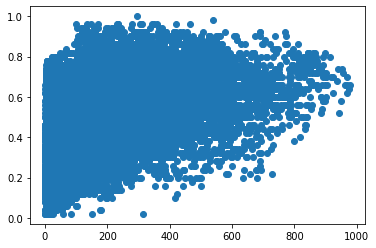

In [8]:
plt.scatter(data['cnt'], data['temp'])
plt.show()

<AxesSubplot:xlabel='cnt', ylabel='workingday'>

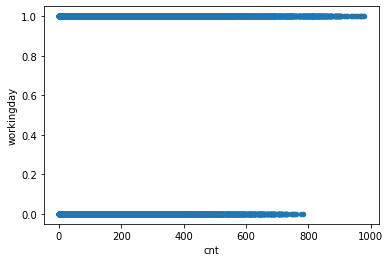

In [9]:
data.plot.scatter(x='cnt', y='workingday')

In [10]:
df = data

In [11]:
df.head()   # Printing the first 5 rows of data

,season,yr,mnth,hr,weekday,workingday,temp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,0.24,0.81,0.0,3,13,16
1,1,0,1,1,6,0,0.22,0.80,0.0,8,32,40
2,1,0,1,2,6,0,0.22,0.80,0.0,5,27,32
3,1,0,1,3,6,0,0.24,0.75,0.0,3,10,13
4,1,0,1,4,6,0,0.24,0.75,0.0,0,1,1


In [12]:
df.tail()   # Printing the last 5 rows of data

,season,yr,mnth,hr,weekday,workingday,temp,hum,windspeed,casual,registered,cnt
17374,1,1,12,19,1,1,0.26,0.60,0.1642,11,108,119
17375,1,1,12,20,1,1,0.26,0.60,0.1642,8,81,89
17376,1,1,12,21,1,1,0.26,0.60,0.1642,7,83,90
17377,1,1,12,22,1,1,0.26,0.56,0.1343,13,48,61
17378,1,1,12,23,1,1,0.26,0.65,0.1343,12,37,49


In [13]:
df.shape

(17379, 12)

array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'yr'}>,
        <AxesSubplot:title={'center':'mnth'}>],
       [<AxesSubplot:title={'center':'hr'}>,
        <AxesSubplot:title={'center':'weekday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'hum'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'cnt'}>]], dtype=object)

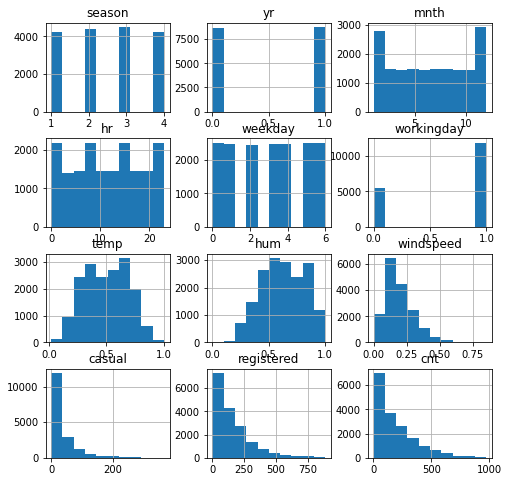

In [14]:
df.hist(figsize=(8,8))

In [15]:
df.describe()       # Generating statistical summary of the data

,season,yr,mnth,hr,weekday,workingday,temp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,3.003683,0.682721,0.496987,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,2.005771,0.465431,0.192556,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,1.000000,0.000000,0.340000,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,3.000000,1.000000,0.500000,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,5.000000,1.000000,0.660000,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,6.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   weekday     17379 non-null  int64  
 5   workingday  17379 non-null  int64  
 6   temp        17379 non-null  float64
 7   hum         17379 non-null  float64
 8   windspeed   17379 non-null  float64
 9   casual      17379 non-null  int64  
 10  registered  17379 non-null  int64  
 11  cnt         17379 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 1.6 MB


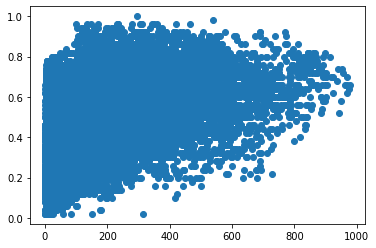

In [17]:
# visual representation of the data to find any observable relationships between provided attributes
plt.scatter(df['cnt'], df['temp'])
plt.show()

In [18]:
df.dtypes       # Checking the data types of the columns

season          int64
yr              int64
mnth            int64
hr              int64
weekday         int64
workingday      int64
temp          float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [19]:
df.columns.values

array(['season', 'yr', 'mnth', 'hr', 'weekday', 'workingday', 'temp',
       'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype=object)

In [20]:
for i in df.columns.values: df.loc[:,i] = df.loc[:,i].astype(dtype="float64")

In [21]:
df.dtypes       # Checking the data types of the columns

season        float64
yr            float64
mnth          float64
hr            float64
weekday       float64
workingday    float64
temp          float64
hum           float64
windspeed     float64
casual        float64
registered    float64
cnt           float64
dtype: object

In [22]:
df.isnull().any()   # Checking the data for null values

season        False
yr            False
mnth          False
hr            False
weekday       False
workingday    False
temp          False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

<AxesSubplot:>

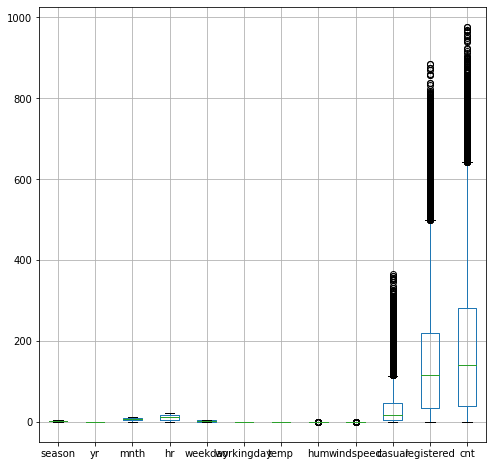

In [23]:
# Boxplot to find the outliers in the columns
df.boxplot(figsize=(8,8))

In [24]:
# Function to remove the outliers from the whole dataset
def remove_outlier(data):
    quant_df = data.quantile([0.10, 0.90])
    for name in list(data.columns): data = data[(data[name] > quant_df.loc[0.10, name]) & (data[name] < quant_df.loc[0.90, name])]
    return data

In [25]:
# df = remove_outlier(df)

<AxesSubplot:>

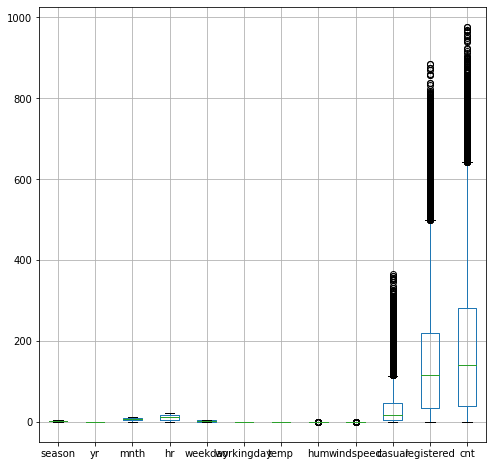

In [26]:
# Boxplot to find the outliers in the columns
df.boxplot(figsize=(8,8))

In [27]:
df.isna().sum()

season        0
yr            0
mnth          0
hr            0
weekday       0
workingday    0
temp          0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'yr'}>,
        <AxesSubplot:title={'center':'mnth'}>],
       [<AxesSubplot:title={'center':'hr'}>,
        <AxesSubplot:title={'center':'weekday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'hum'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'cnt'}>]], dtype=object)

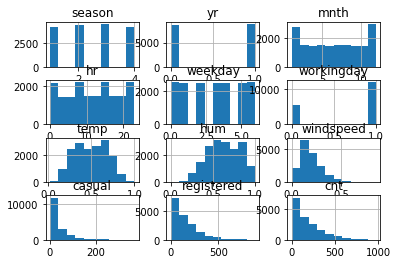

In [28]:
df.hist()

In [29]:
df.describe()

,season,yr,mnth,hr,weekday,workingday,temp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,3.003683,0.682721,0.496987,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,2.005771,0.465431,0.192556,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,1.000000,0.000000,0.340000,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,3.000000,1.000000,0.500000,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,5.000000,1.000000,0.660000,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,6.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


> Visualizing the data to check for skewness and reduce it

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='temp', ylabel='Density'>

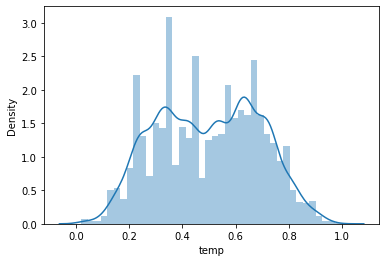

In [30]:
sn.distplot(df['temp'])

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cnt', ylabel='Density'>

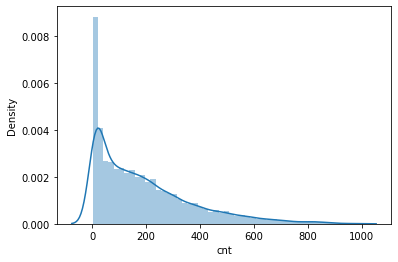

In [31]:
sn.distplot(df['cnt'])

In [32]:
df.skew()

season       -0.005416
yr           -0.010243
mnth         -0.009253
hr           -0.010680
weekday      -0.002998
workingday   -0.785258
temp         -0.006021
hum          -0.111287
windspeed     0.574905
casual        2.499237
registered    1.557904
cnt           1.277412
dtype: float64

Skewness is 0.2864746130055621
Mean is 12.015850997640825 , Median is  11.916375287812984


c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cnt', ylabel='Density'>

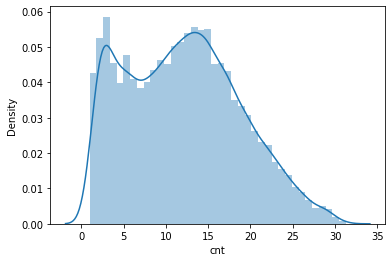

In [33]:
target = (np.sqrt((df['cnt'])))
print ('Skewness is', target.skew())
print("Mean is",target.mean(), ", Median is ", target.median())
sn.distplot(target)
# df['cnt'] = target

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness is -0.4064345302850352
Mean is 0.6899864066211882 , Median is  0.7071067811865476


<AxesSubplot:xlabel='temp', ylabel='Density'>

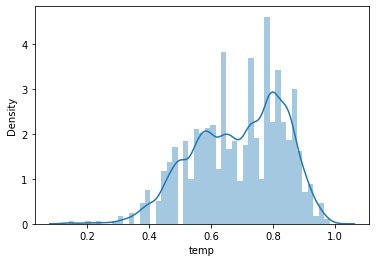

In [34]:
target = (np.sqrt((df['temp'])))
print ('Skewness is', target.skew())
print("Mean is",target.mean(), ", Median is ", target.median())
sn.distplot(target)
# df['YearsExperience'] = target

In [35]:
df.skew()

season       -0.005416
yr           -0.010243
mnth         -0.009253
hr           -0.010680
weekday      -0.002998
workingday   -0.785258
temp         -0.006021
hum          -0.111287
windspeed     0.574905
casual        2.499237
registered    1.557904
cnt           1.277412
dtype: float64

In [36]:
df.describe()

,season,yr,mnth,hr,weekday,workingday,temp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,3.003683,0.682721,0.496987,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,2.005771,0.465431,0.192556,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,1.000000,0.000000,0.340000,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,3.000000,1.000000,0.500000,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,5.000000,1.000000,0.660000,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,6.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [37]:
from sklearn.preprocessing import StandardScaler
# trying with scaling the output too output :
# Y = X['y']
rs = StandardScaler().fit(df)
for item in df:
    df[item]=rs.fit_transform(np.array(df[item]).reshape(-1,1))
# X['y']=Y

In [38]:
df.describe()

,season,yr,mnth,hr,weekday,workingday,temp,hum,windspeed,casual,registered,cnt
count,1.737900e+04,1.737900e+04,17379.000000,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04
mean,-1.439157e-16,2.682065e-16,0.000000,-7.456426e-17,1.367608e-16,5.233297e-17,1.569989e-16,-3.074562e-16,1.537281e-16,2.289567e-17,-3.924973e-17,-1.054836e-16
std,1.000029e+00,1.000029e+00,1.000029,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00
min,-1.356634e+00,-1.005134e+00,-1.610438,-1.670004e+00,-1.497563e+00,-1.466900e+00,-2.477205e+00,-3.251166e+00,-1.553889e+00,-7.236025e-01,-1.016081e+00,-1.039037e+00
25%,-4.531991e-01,-1.005134e+00,-0.738009,-8.022254e-01,-9.989873e-01,-1.466900e+00,-8.153035e-01,-7.631431e-01,-6.996886e-01,-6.424726e-01,-7.914407e-01,-8.240221e-01
50%,4.502360e-01,9.948919e-01,0.134419,6.555318e-02,-1.836057e-03,6.817098e-01,1.564696e-02,1.436398e-02,3.189880e-02,-3.788002e-01,-2.562677e-01,-2.616742e-01
75%,4.502360e-01,9.948919e-01,1.006848,9.333318e-01,9.953152e-01,6.817098e-01,8.465975e-01,7.918711e-01,5.198962e-01,2.499570e-01,4.374750e-01,5.046626e-01
max,1.353671e+00,9.948919e-01,1.588467,1.656481e+00,1.493891e+00,6.817098e-01,2.612367e+00,1.932215e+00,5.399871e+00,6.720071e+00,4.837786e+00,4.341860e+00


### Train/Test Split

In [39]:
X = df.drop('cnt', axis=1)
y = np.array(df['cnt'])


In [40]:
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [48]:
X_test.shape

(4345, 11)

### Model Fitting and Training

In [41]:
from sklearn.svm import SVR

try:
    regressor=SVR(kernel="rbf", C=10, gamma=0.1, epsilon=0.1)
    # regressor=SVR(kernel="linear")
    regressor.fit(X_train,y_train)
    pred=regressor.predict(X_test)
    print(regressor.score(X_test,y_test))
except Exception as e:
    print(f"Error : {e}")

0.9970818694951047


### Model Testing

In [42]:
pred1=regressor.predict(X_train)
print(regressor.score(X_train,y_train))

0.9975612089238803


Error : x and y must be the same size


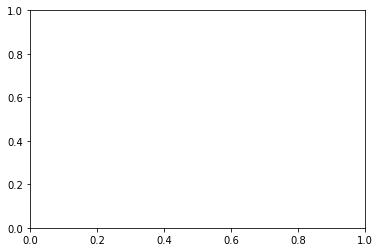

In [43]:
try:
    y_pred = regressor.predict(X_test)
    plt.scatter(X_test, y_test, color ='red')
    plt.plot(X_test, y_pred, color ='blue')
    plt.show()
except Exception as e:
    print(f"Error : {e}")

### Evaluation Metrics

In [44]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
 
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.042547401147081935
MSE: 0.002928821639624156
RMSE: 0.0541185886699215


In [45]:
Accuracy = (1-mse)*100

In [46]:
print(Accuracy)

99.70711783603758
